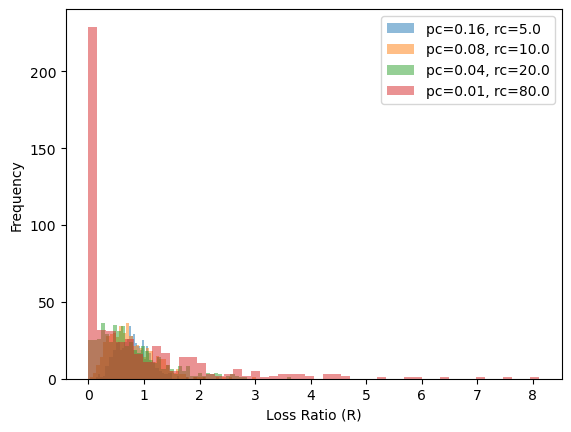

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean_policies_sold = 100
std_policies_sold = 10
pc_values = [0.16, 0.08, 0.04, 0.01]
rc_values = [5.0, 10.0, 20.0, 80.0]
num_replications = 500

# Function to run a single replication
def run_replication(pc, rc):
    S = int(np.random.normal(mean_policies_sold, std_policies_sold))
    TP = 0  # Total Premiums
    TL = 0  # Total Losses
    
    for _ in range(S):
        Xi = np.random.uniform(50, 200)
        if np.random.uniform(0, 1) <= 0.4:
            Pi = 1.2 * Xi
        else:
            Pi = Xi
        TP += Pi
        
        if np.random.uniform(0, 1) <= pc:
            Yi = np.random.exponential(rc * Pi)
            Ci = Yi
        else:
            Ci = 0.0
        TL += Ci
    
    R = TL / TP if TP != 0 else 0
    return R

# Running the simulations
results = { (pc, rc): [] for pc, rc in zip(pc_values, rc_values) }

for pc, rc in zip(pc_values, rc_values):
    for _ in range(num_replications):
        R = run_replication(pc, rc)
        results[(pc, rc)].append(R)

# Plotting the results
fig, ax = plt.subplots()
for (pc, rc), ratios in results.items():
    ax.hist(ratios, bins=50, alpha=0.5, label=f'pc={pc}, rc={rc}')
ax.set_xlabel('Loss Ratio (R)')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()